In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

32.71175526009125 179.19347774344465
18.754747000555327 73.48599977365743
44.49139949460749 -154.07772724265055
4.91213918130552 -138.70117177298346
60.36310849445215 107.17384593766621
52.19046342857638 -160.67019030448824
-23.327382815617568 -2.4967838339960053
61.63124183745634 165.42837523669897
48.971468949731246 125.09412622850624
-33.89378839838304 105.83907818082582
84.85185412872735 1.4726433616271493
-73.60429435110795 61.527882711613415
-76.29298441084988 105.74273318323424
73.80851505399119 -156.42629076758502
67.04259107601786 16.741464545759953
-84.0255983658819 70.87055407811562
77.62247721697625 34.015884895856175
-44.157268175295364 -52.644142105991335
84.76002540679855 -80.03324494203919
-60.06637344713791 -162.52611604584348
72.53381810540873 -73.4739025655766
63.67308652636348 -37.634996599716885
28.164438860857317 80.79760643340666
10.804842336515975 -106.99314908559852
3.5687075086465683 119.3661558403216
-27.51295269049004 -57.87514398865389
0.5651329473880651 17

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=b302b1c49258578c41414d021d1d5d3e


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | lonavale
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | yerbogachen
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 9 of Set 1 | nenjiang
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | kjopsvik
Processing Record 16 of Set 1 | vardo
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | lakhimpur
Processing Recor

Processing Record 36 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 4 | asau
Processing Record 38 of Set 4 | bandrele
Processing Record 39 of Set 4 | codrington
Processing Record 40 of Set 4 | krasnoselkup
Processing Record 41 of Set 4 | pacific grove
Processing Record 42 of Set 4 | omsukchan
Processing Record 43 of Set 4 | whyalla
Processing Record 44 of Set 4 | apia
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 48 of Set 4 | baruun-urt
Processing Record 49 of Set 4 | upernavik
Processing Record 50 of Set 4 | isla mujeres
Processing Record 1 of Set 5 | kapaa
Processing Record 2 of Set 5 | lata
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | waipawa
Processing Record 6 of Set 5 | chokurdakh
Processing Record 7 of Set 5 | touros
Processing Record 8 of Set 5 

Processing Record 27 of Set 8 | praya
Processing Record 28 of Set 8 | esperance
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | puerto madryn
Processing Record 31 of Set 8 | yulara
Processing Record 32 of Set 8 | caravelas
Processing Record 33 of Set 8 | dunedin
Processing Record 34 of Set 8 | bengkulu
Processing Record 35 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 8 | ribeira grande
Processing Record 37 of Set 8 | iquique
Processing Record 38 of Set 8 | kenai
Processing Record 39 of Set 8 | inirida
Processing Record 40 of Set 8 | puerto leguizamo
Processing Record 41 of Set 8 | nizhniy kuranakh
Processing Record 42 of Set 8 | buchanan
Processing Record 43 of Set 8 | prince rupert
Processing Record 44 of Set 8 | maarianhamina
Processing Record 45 of Set 8 | canaries
Processing Record 46 of Set 8 | rapid city
Processing Record 47 of Set 8 | namibe
Processing Record 48 of Set 8 | anadyr
Processing Record 49 of Set 8 | vaitupu
City 

Processing Record 17 of Set 12 | saint-joseph
Processing Record 18 of Set 12 | hay river
Processing Record 19 of Set 12 | terney
Processing Record 20 of Set 12 | taixing
Processing Record 21 of Set 12 | sao jose da coroa grande
Processing Record 22 of Set 12 | lasa
Processing Record 23 of Set 12 | yongzhou
Processing Record 24 of Set 12 | ilebo
Processing Record 25 of Set 12 | vacaria
Processing Record 26 of Set 12 | velika plana
Processing Record 27 of Set 12 | carutapera
Processing Record 28 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 29 of Set 12 | tommot
Processing Record 30 of Set 12 | charcas
Processing Record 31 of Set 12 | raudeberg
Processing Record 32 of Set 12 | naryan-mar
Processing Record 33 of Set 12 | moerai
Processing Record 34 of Set 12 | preobrazheniye
Processing Record 35 of Set 12 | bosaso
Processing Record 36 of Set 12 | maghama
City not found. Skipping...
Processing Record 37 of Set 12 | dharampuri
Processing Record 38 of Set 12 | ubinsk

In [12]:
len(city_data)

556

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,293.08,75,25,1.71,RU,2022-08-18 00:48:20
1,Lonavale,18.7500,73.4167,293.48,97,55,2.79,IN,2022-08-18 00:48:21
2,Kodiak,57.7900,-152.4072,289.88,67,20,5.14,US,2022-08-18 00:48:22
3,Atuona,-9.8000,-139.0333,298.35,71,1,9.79,PF,2022-08-18 00:48:22
4,Yerbogachen,61.2767,108.0108,283.11,96,100,2.48,RU,2022-08-18 00:48:23
5,Bethel,41.3712,-73.4140,295.08,84,100,0.00,US,2022-08-18 00:48:24
6,Jamestown,42.0970,-79.2353,290.77,73,0,3.09,US,2022-08-18 00:48:25
7,Nenjiang,49.1833,125.2167,293.99,75,57,4.51,CN,2022-08-18 00:48:26
8,Busselton,-33.6500,115.3333,285.87,65,25,1.09,AU,2022-08-18 00:48:27
9,Albany,42.6001,-73.9662,291.30,93,100,2.04,US,2022-08-18 00:44:58


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

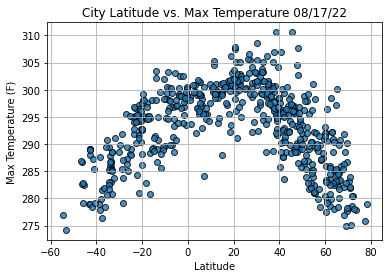

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

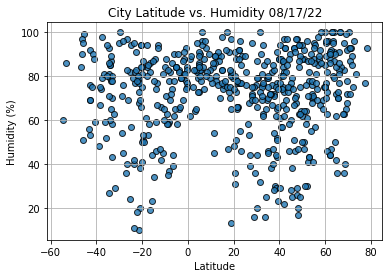

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

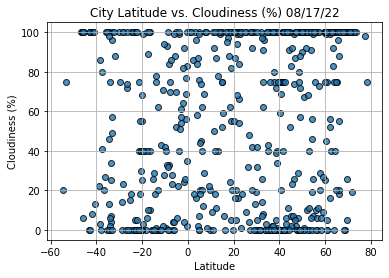

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

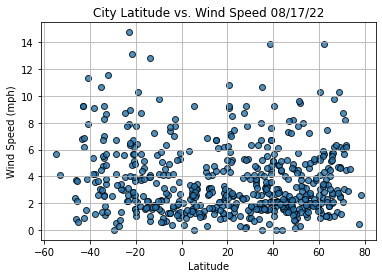

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,293.08,75,25,1.71,RU,2022-08-18 00:48:20
1,Lonavale,18.7500,73.4167,293.48,97,55,2.79,IN,2022-08-18 00:48:21
2,Kodiak,57.7900,-152.4072,289.88,67,20,5.14,US,2022-08-18 00:48:22
4,Yerbogachen,61.2767,108.0108,283.11,96,100,2.48,RU,2022-08-18 00:48:23
5,Bethel,41.3712,-73.4140,295.08,84,100,0.00,US,2022-08-18 00:48:24


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

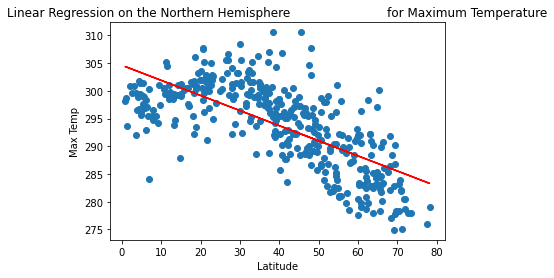

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

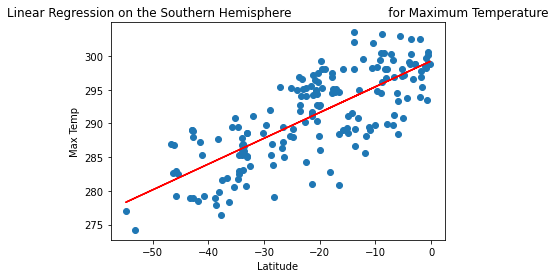

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

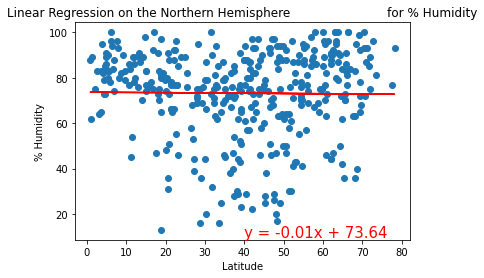

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

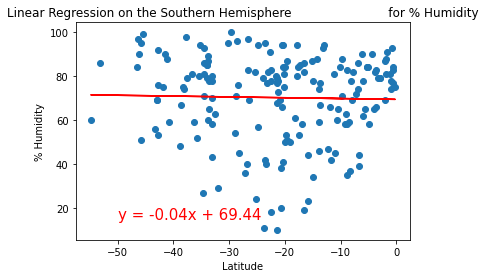

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [30]:
#6.4.4
#Refactor the code we have been using for linear regression lines and plots to create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
#Call the plot_linear_regression function with the correct arguments to create the linear regression line and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot.  

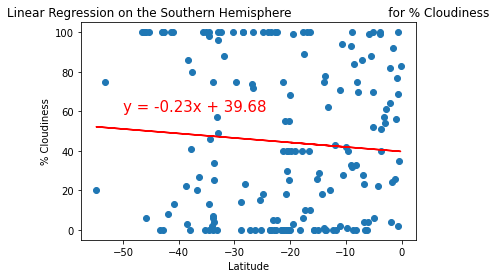

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

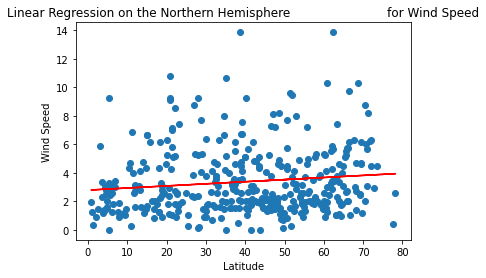

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

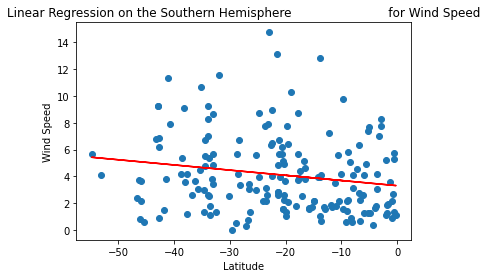

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))